In [1]:
import pandas as pd
import scipy.stats as ss
import matplotlib
%matplotlib inline

matplotlib.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
ccss = pd.read_excel("CCSS_sample.xlsx",sheet_name = "CCSS")
ccss.head()

,time,id,s0,s2,s3,s4,s5,s7,s9,c0_1,...,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
0,200704,1,北京,男,20,本科,公司普通职员（白领）,未婚,2000-2999元,0,...,2500.0,100,200,200,200,100,100,109.349371,88.035919,121.071238
1,200704,2,北京,男,24,高中/中专,公司普通职员（白领）,未婚,6000-7999元,0,...,7000.0,100,100,100,150,200,100,93.728032,88.035919,96.856991
2,200704,3,上海,男,20,高中/中专,无业/待业/失业/家庭主妇,未婚,1000-1499元,0,...,1250.0,100,150,150,100,100,100,93.728032,88.035919,96.856991
3,200704,4,北京,女,65,大专,企/事业管理人员,已婚,1000-1499元,0,...,1250.0,150,150,100,100,100,200,109.349371,154.062858,84.749867
4,200704,5,上海,女,40,高中/中专,公司普通职员（白领）,已婚,99拒绝回答,0,...,NaN,100,100,100,100,150,100,85.917363,88.035919,84.749867


In [3]:
ccss.s3.mean()

36.358326068003485

In [4]:
ccss.groupby("s0").s3.mean()

s0
上海    37.759690
北京    36.431217
广州    34.866492
Name: s3, dtype: float64

In [5]:
ccss.groupby("s0")["s3","index1"].mean()

,s3,index1
s0,,
上海,37.759690,94.676615
北京,36.431217,97.592041
广州,34.866492,95.445562


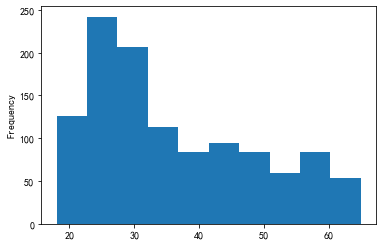

In [6]:
ccss.s3.plot.hist()

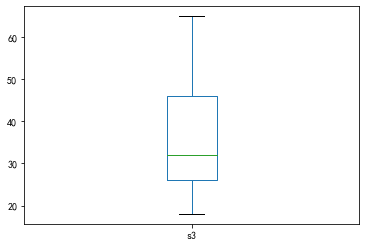

In [7]:
ccss.s3.plot.box()

In [8]:
ccss.describe()

,time,id,s3,a4,a8,a9,a10,a16,Qs9,Qa3,Qa4,Qa8,Qa9,Qa10,Qa16,index1,index1a,index1b
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,992.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,200778.085440,192.285092,36.358326,3.379250,3.250218,3.762860,3.326940,3.387969,7543.346774,117.088056,124.716652,122.798605,98.474281,140.932868,108.326068,95.893501,99.222697,94.059791
std,81.488785,258.900612,12.860567,2.479942,2.238250,2.202152,2.887416,1.917667,6987.619590,50.000647,44.816700,39.480886,50.820751,47.270174,34.296546,20.997097,28.433333,23.116453
min,200704.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200704.000000,73.000000,26.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3500.000000,100.000000,100.000000,100.000000,50.000000,100.000000,100.000000,85.917363,88.035919,84.749867
50%,200712.000000,151.000000,32.000000,3.000000,3.000000,3.000000,2.000000,3.000000,5500.000000,100.000000,100.000000,100.000000,100.000000,150.000000,100.000000,93.728032,88.035919,96.856991
75%,200812.000000,230.500000,46.000000,3.000000,3.000000,4.000000,3.000000,3.000000,9000.000000,150.000000,150.000000,150.000000,150.000000,200.000000,100.000000,109.349371,110.044898,108.964114
max,200912.000000,1570.000000,65.000000,9.000000,9.000000,9.000000,9.000000,9.000000,35000.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,156.213387,176.071837,145.285486


In [9]:
ccss.groupby("s0").s3.describe(percentiles = [.05,.1])

,count,mean,std,min,5%,10%,50%,max
s0,,,,,,,,
上海,387.0,37.759690,13.673530,18.0,21.0,23.0,33.0,65.0
北京,378.0,36.431217,13.129301,18.0,20.0,22.0,33.0,65.0
广州,382.0,34.866492,11.544072,18.0,21.0,23.0,32.0,65.0


In [10]:
from statsmodels.stats import weightstats as ws
des = ws.DescrStatsW(ccss.loc[:,["index1","index1a","index1b"]])
des.nobs
des.var

array([440.49372109, 807.74958831, 533.90452841])

In [11]:
ccss.time.value_counts()

200812    304
200712    304
200704    300
200912    239
Name: time, dtype: int64

In [12]:
ccss.s3.value_counts(bins = 20)

(22.7, 25.05]                  151
(29.75, 32.1]                  124
(25.05, 27.4]                   91
(27.4, 29.75]                   83
(20.35, 22.7]                   70
(34.45, 36.8]                   67
(43.85, 46.2]                   62
(17.951999999999998, 20.35]     56
(57.95, 60.3]                   56
(48.55, 50.9]                   53
(39.15, 41.5]                   49
(32.1, 34.45]                   46
(36.8, 39.15]                   35
(41.5, 43.85]                   32
(46.2, 48.55]                   31
(62.65, 65.0]                   31
(53.25, 55.6]                   30
(50.9, 53.25]                   29
(55.6, 57.95]                   28
(60.3, 62.65]                   23
Name: s3, dtype: int64

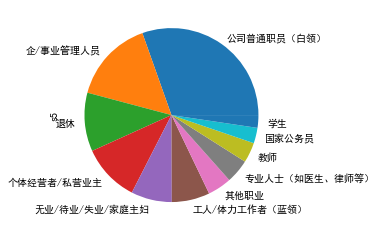

In [13]:
ccss.s5.value_counts().plot.pie()

In [14]:
pd.crosstab(ccss.s2,ccss.s0)

s0,上海,北京,广州
s2,,,
女,166,190,154
男,221,188,228


In [15]:
pd.crosstab(ccss.s2,ccss.s0,normalize = 0,margins = True)

s0,上海,北京,广州
s2,,,
女,0.325490,0.372549,0.301961
男,0.346939,0.295133,0.357928
All,0.337402,0.329555,0.333043


In [16]:
pd.crosstab([ccss.s2,ccss.O1],[ccss.s0,ccss.s5])

s0               上海                                                            \
s5    专业人士（如医生、律师等） 个体经营者/私营业主 企/事业管理人员 公司普通职员（白领） 其他职业 国家公务员 学生 工人/体力工作者（蓝领）   
s2 O1                                                                           
女  有              0          2        9         10    2     3  1            1   
   没有             3         11       10         54    3     3  2            7   
男  有              4         15       16         14    0     1  1            1   
   没有             6         13       29         45    9     1  6           15   

s0                      ...         广州                                    \
s5    教师 无业/待业/失业/家庭主妇  ... 个体经营者/私营业主 企/事业管理人员 公司普通职员（白领） 其他职业 国家公务员 学生   
s2 O1                   ...                                                
女  有   1             2  ...          2        3         11    3     0  1   
   没有  2             9  ...          8       12         41    3     0  1   
男  有   2             0  ...         16       18         23    2     3  2   
   没有  7            13  ...         21       26         40   10     7  4   

s0                                       
s5    工人/体力工作者（蓝领） 教师 无业/待业/失业/家庭主妇  退休  
s2 O1                                    
女  有             0  1             9   1  
   没有           13  3            14  18  
男  有             0  2             0   1  
   没有           16  6            13   6  

[4 rows x 33 columns]

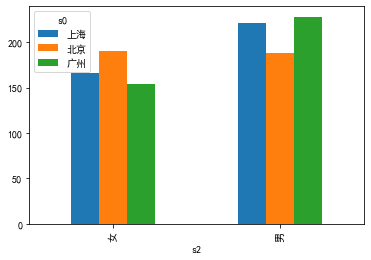

In [17]:
pd.crosstab(ccss.s2,ccss.s0).plot.bar()

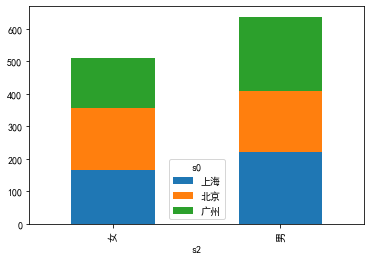

In [18]:
pd.crosstab(ccss.s2,ccss.s0).plot.bar(stacked = True)

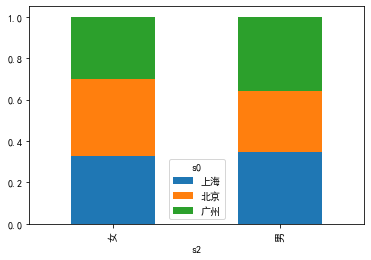

In [19]:
pd.crosstab(ccss.s2,ccss.s0,normalize = 0).plot.bar(stacked = True)

In [20]:
ccss.query("s0 == '广州' & time == 200704").index1.describe()

count    100.000000
mean      97.164727
std       20.808324
min       31.242677
25%       85.917363
50%      101.538702
75%      109.349371
max      140.592049
Name: index1, dtype: float64

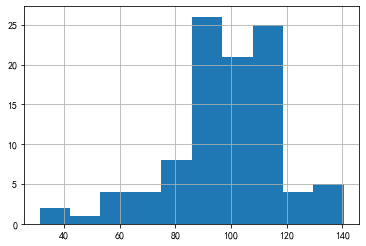

In [21]:
ccss.query("s0 == '广州' & time == 200704").index1.hist()

In [22]:
from scipy import stats as ss
ss.ttest_1samp(ccss.query("s0 == '广州' & time == 200704").index1,100) # 100 中出现17.6次

Ttest_1sampResult(statistic=-1.3625667518512996, pvalue=0.17611075148299993)

In [23]:
from statsmodels.stats import weightstats as ws
des = ws.DescrStatsW(ccss.query("s0 == '广州' & time == 200704").index1)
des.mean

97.16472701710536

In [24]:
des.tconfint_mean()

(93.03590418536487, 101.29354984884586)

In [25]:
des.ttest_mean(100)

(-1.3625667518512996, 0.17611075148299993, 99.0)

In [26]:
des.ttest_mean(100,"smaller")

(-1.3625667518512996, 0.08805537574149996, 99.0)

In [27]:
des.ttest_mean(100,"larger")

(-1.3625667518512996, 0.9119446242585001, 99.0)

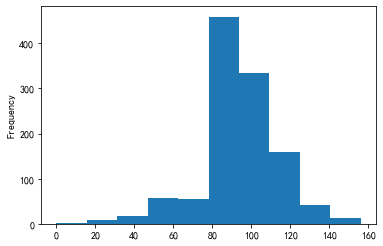

In [28]:
ccss.index1.plot.hist()

In [29]:
ccss.groupby("s7").index1.describe()

,count,mean,std,min,25%,50%,75%,max
s7,,,,,,,,
已婚,790.0,95.033106,21.282487,0.000000,85.917363,93.728032,109.349371,156.213387
未婚,343.0,98.282359,19.959824,23.432008,85.917363,101.538702,109.349371,156.213387
离异/分居/丧偶,14.0,85.917363,24.316544,31.242677,72.248692,85.917363,101.538702,124.970710


In [30]:
# 方差齐检验
ss.levene(ccss.index1[ccss.s7 == '未婚'],ccss.index1[ccss.s7=="已婚"])

LeveneResult(statistic=0.6178737960192996, pvalue=0.43200314605212653)

In [31]:
ss.ttest_ind(ccss.index1[ccss.s7 == "未婚"],ccss.index1[ccss.s7=="已婚"])

Ttest_indResult(statistic=2.405261376009453, pvalue=0.016320721789339597)

In [32]:
# 校正T检验
ss.ttest_ind(ccss.index1[ccss.s7 == "未婚"],ccss.index1[ccss.s7=="已婚"],equal_var = False)

Ttest_indResult(statistic=2.4669071564965845, pvalue=0.013870360692360313)

In [33]:
ss.ttest_ind_from_stats(95.033106,21.282487,790,
                       98.282359,19.959824,343)

Ttest_indResult(statistic=-2.4052618666155126, pvalue=0.016320699991532902)

In [34]:
d1 = ws.DescrStatsW(ccss.index1[ccss.s7 == '未婚'])
d2 = ws.DescrStatsW(ccss.index1[ccss.s7 == '已婚'])

comp = ws.CompareMeans(d1,d2)
comp.ttest_ind()

(2.4052613760094634, 0.01632072178933914, 1131.0)

In [35]:
comp.ttest_ind(usevar = 'unequal')

(2.4669071564965956, 0.013870360692359867, 690.0875759383671)

In [36]:
ccss_p = pd.read_excel("CCSS_sample.xlsx",sheet_name = "CCSS_pair")
ccss_p.head()

,time,id,s2,s3,Qa3,Qa4,Qa8,Qa10,Qa16,index1,index1a,index1b,Qa3n,Qa4n,Qa8n,Qa10n,Qa16n,index1n,index1an,index1bn
0,200704,22,2,59,100,100,100,100,50,70.296024,66.026939,72.642743,50,100,100,100,100,70.296024,66.026939,72.642743
1,200704,40,2,28,150,150,150,150,100,109.349371,110.044898,108.964114,150,100,100,200,100,101.538702,110.044898,96.856991
2,200704,45,1,55,100,50,50,100,200,78.106694,132.053878,48.428495,150,100,150,150,100,101.538702,110.044898,96.856991
3,200704,69,1,26,150,200,150,50,100,101.538702,110.044898,96.856991,150,100,150,200,200,124.970710,154.062858,108.964114
4,200704,98,1,63,100,200,150,150,100,109.349371,88.035919,121.071238,150,150,100,0,100,78.106694,110.044898,60.535619


In [37]:
ccss_p.loc[:,["index1","index1n"]].describe()

,index1,index1n
count,88.000000,88.000000
mean,98.787216,96.035730
std,16.152752,20.102950
min,70.296024,39.053347
25%,85.917363,85.917363
50%,101.538702,93.728032
75%,109.349371,109.349371
max,132.781379,132.781379


In [38]:
ss.pearsonr(ccss_p.index1,ccss_p.index1n)

(0.26380117986159085, 0.013011623679509974)

In [39]:
ss.ttest_rel(ccss_p.index1,ccss_p.index1n)

Ttest_relResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [40]:
ss.ttest_1samp(ccss_p.index1 - ccss_p.index1n,0)

Ttest_1sampResult(statistic=1.1616334792419984, pvalue=0.24856144386191056)

In [41]:
des = ws.DescrStatsW(ccss_p.index1 - ccss_p.index1n)
des.ttest_mean()

(1.1616334792419987, 0.2485614438619105, 87.0)

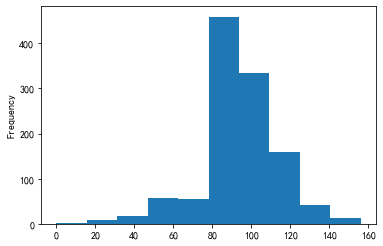

In [42]:
 # 数据正态性考察
ccss.index1.plot.hist()

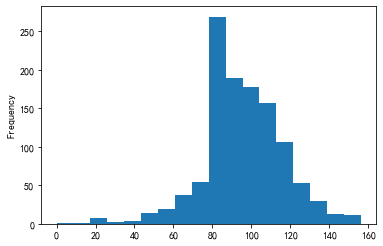

In [43]:
ccss.index1.plot.hist(bins = 18)

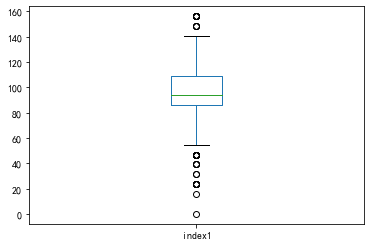

In [44]:
ccss.index1.plot.box()

In [45]:
# 假设检验考察正态性
ss.kstest(ccss.index1,"norm")

KstestResult(statistic=0.999128160418483, pvalue=0.0)

In [46]:
ks = lambda x : ss.kstest(x,"norm")
ccss.groupby("time").index1.apply(ks)

time
200704                   (1.0, 0.0)
200712    (0.9967105263157895, 0.0)
200812                   (1.0, 0.0)
200912                   (1.0, 0.0)
Name: index1, dtype: object

In [47]:
ccss.groupby("time").index1.apply(ss.shapiro)

time
200704    (0.966885507106781, 2.2581652956432663e-06)
200712    (0.9562033414840698, 6.699920618302713e-08)
200812    (0.9770516753196716, 8.659828745294362e-05)
200912    (0.9523671865463257, 4.465105973849859e-07)
Name: index1, dtype: object

time
200704    AxesSubplot(0.125,0.125;0.775x0.755)
200712    AxesSubplot(0.125,0.125;0.775x0.755)
200812    AxesSubplot(0.125,0.125;0.775x0.755)
200912    AxesSubplot(0.125,0.125;0.775x0.755)
Name: index1, dtype: object

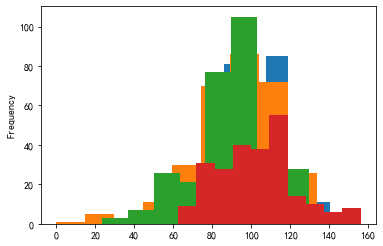

In [48]:
# 方差齐性
ccss.groupby("time").index1.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002160992B780>,
      dtype=object)

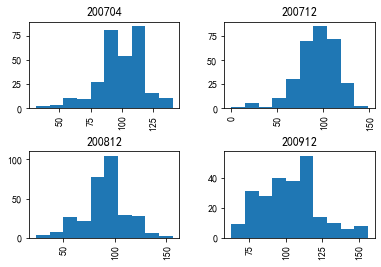

In [49]:
ccss.index1.hist(by = ccss.time)

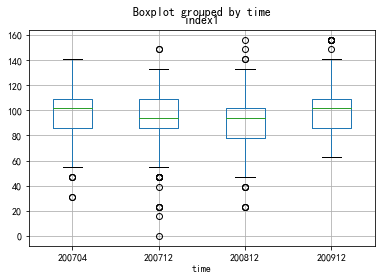

In [50]:
ccss.boxplot(column = "index1",by = "time")

200704         AxesSubplot(0.1,0.559091;0.363636x0.340909)
200712    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
200812             AxesSubplot(0.1,0.15;0.363636x0.340909)
200912        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

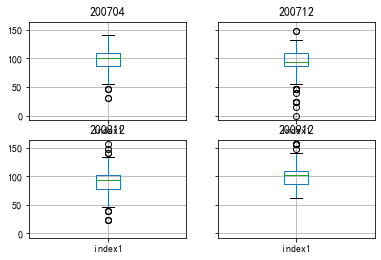

In [51]:
ccss.groupby("time").boxplot(column = "index1")

In [52]:
ss.bartlett(
    ccss.index1[ccss.time == 200704],
    ccss.index1[ccss.time == 200712],
    ccss.index1[ccss.time == 200812],
    ccss.index1[ccss.time == 200912]
)

BartlettResult(statistic=11.123818483344097, pvalue=0.011074841431975263)

In [53]:
ss.levene(
    ccss.index1[ccss.time == 200704],
    ccss.index1[ccss.time == 200712],
    ccss.index1[ccss.time == 200812],
    ccss.index1[ccss.time == 200912]
)

LeveneResult(statistic=2.2068913639343792, pvalue=0.08563270755698366)

In [54]:
ccss.query("s0 == '北京'").groupby("time").index1.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
200704,100.0,100.054675,17.223412,54.674686,85.917363,101.538702,109.349371,140.592049
200712,101.0,97.130700,19.398654,46.864016,85.917363,93.728032,109.349371,148.402718
200812,102.0,91.966803,19.504446,39.053347,78.106694,93.728032,101.538702,148.402718
200912,75.0,102.580124,16.954212,70.296024,89.822698,101.538702,109.349371,148.402718


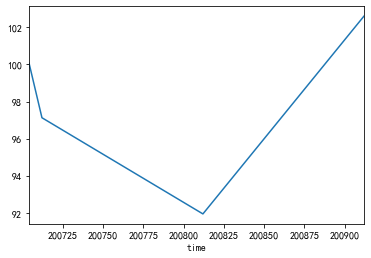

In [55]:
ccss.query("s0 == '北京'").groupby("time").index1.mean().plot()

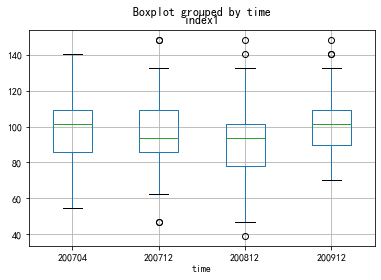

In [56]:
ccss[ccss.s0 == '北京'].boxplot("index1","time")

In [57]:
a = ccss.query("s0 == '北京' & time == '200704' ").index1
b = ccss.query("s0 == '北京' & time == '200712' ").index1
c = ccss.query("s0 == '北京' & time == '200812' ").index1
d = ccss.query("s0 == '北京' & time == '200912' ").index1

ss.levene(a,b,c,d)

LeveneResult(statistic=0.44332330387152036, pvalue=0.7221678627997157)

In [58]:
ss.f_oneway(a,b,c,d)

F_onewayResult(statistic=5.630155391280303, pvalue=0.0008777240313291846)

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ccss.time = ccss.time.astype("str")
# 因变量index1 自变量 time
model = ols("index1 ~ time",data = ccss.loc[ccss.s0 == '北京',:]).fit()
# 一般线性模型 默认3
restable = sm.stats.anova_lm(model,typ = 3)
restable

,sum_sq,df,F,PR(>F)
Intercept,1.001094e+06,1.0,2955.259790,1.227203e-179
time,5.721643e+03,3.0,5.630155,8.777240e-04
Residual,1.266924e+05,374.0,NaN,NaN


In [60]:
# 两两比较的方法
from statsmodels.sandbox.stats import multicomp as mc

mc.multipletests([0.1,0.2,0.3],method = 'b')

(array([False, False, False]),
 array([0.3, 0.6, 0.9]),
 0.016952427508441503,
 0.016666666666666666)

In [61]:
poshoc = mc.MultiComparison(ccss.index1,ccss.time)
res = poshoc.tukeyhsd()

In [62]:
res

In [63]:
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
200704,200712,-4.1972,0.0597,-8.5083,0.1139,False
200704,200812,-7.897,0.001,-12.2081,-3.5859,True
200704,200912,3.6599,0.1706,-0.9332,8.253,False
200712,200812,-3.6998,0.1198,-7.9966,0.597,False
200712,200912,7.8571,0.001,3.2774,12.4368,True
200812,200912,11.5569,0.001,6.9772,16.1366,True


In [64]:
import scikit_posthocs as sp
pc = sp.posthoc_conover(ccss,val_col = "index1",group_col = "time",p_adjust = "bonferroni")
pc

,200704,200712,200812,200912
200704,-1.000000,0.144102,2.043272e-06,1.000000e+00
200712,0.144102,-1.000000,2.434703e-02,1.211434e-02
200812,0.000002,0.024347,-1.000000e+00,5.260855e-08
200912,1.000000,0.012114,5.260855e-08,-1.000000e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x2160b940710>,
 <matplotlib.colorbar.ColorbarBase at 0x2160b9b5c18>)

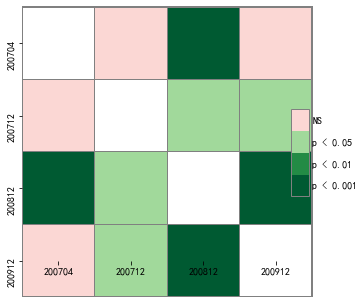

In [65]:
heatmap_args = {"linewidths":0.25,"linecolor":"0.5","clip_on":False,"square":True,"cbar_ax_bbox":[0.80,0.35,0.04,0.3]}
sp.sign_plot(pc,**heatmap_args)

In [66]:
print(ss.mannwhitneyu(ccss.Qa3[ccss.s7 == '未婚'],ccss.Qa3[ccss.s7 == '已婚']))

MannwhitneyuResult(statistic=121516.5, pvalue=0.0016970638386570689)


In [70]:
# 卡方检验
tb1 = pd.crosstab(ccss.Ts9,ccss.O1)
tb1

O1,有,没有
Ts9,,
"Below 48,000",32,303
"Over 48,000",225,429


In [71]:
# 每个单元格的期望频数
ss.contingency.expected_freq(tb1)

array([[ 87.05257836, 247.94742164],
       [169.94742164, 484.05257836]])

In [72]:
ss.contingency.margins(tb1)

[array([[335],
        [654]], dtype=int64), array([[257, 732]], dtype=int64)]

In [73]:
ss.chi2_contingency(tb1,False)

(71.13403472094657,
 3.3376260954267e-17,
 1,
 array([[ 87.05257836, 247.94742164],
        [169.94742164, 484.05257836]]))

In [75]:
import statsmodels.stats.contingency_tables as tbl

table = tbl.Table(pd.crosstab(ccss.Ts9,ccss.O1))
table

In [77]:
print(table.table_orig)
print(table.fittedvalues)
print(table.resid_pearson)
print(table.chi2_contribs)

O1              有   没有
Ts9                   
Below 48,000   32  303
Over 48,000   225  429
O1                     有          没有
Ts9                                 
Below 48,000   87.052578  247.947422
Over 48,000   169.947422  484.052578
O1                   有        没有
Ts9                             
Below 48,000 -5.900473  3.496213
Over 48,000   4.222993 -2.502254
O1                    有         没有
Ts9                               
Below 48,000  34.815584  12.223504
Over 48,000   17.833671   6.261275


In [78]:
table.marginal_probabilities

(Ts9
 Below 48,000    0.338726
 Over 48,000     0.661274
 dtype: float64, O1
 有     0.259858
 没有    0.740142
 dtype: float64)

In [81]:
res = table.test_nominal_association()
print(res.statistic,res.df,res.pvalue)

71.13403472094657 1 0.0


In [83]:
import statsmodels.stats.contingency_tables as tbl2 

table2 = tbl2.Table(pd.crosstab(ccss.s0,ccss.O1))
table2.table_orig

O1,有,没有
s0,,
上海,87,300
北京,118,258
广州,107,274


In [84]:
res = table2.test_nominal_association()
print(res.statistic,res.df,res.pvalue)

7.80961277431242 2 0.02014485441628988


In [86]:
table2.local_oddsratios

O1,有,没有
s0,,
上海,0.634068,NaN
北京,1.171195,NaN
广州,NaN,NaN


In [88]:
table2.cumulative_oddsratios

O1,有,没有
s0,,
上海,0.685689,NaN
北京,0.940776,NaN
广州,NaN,NaN


In [90]:
tb1 = pd.crosstab(ccss.Ts9,ccss.O1)
ss.chi2_contingency(tb1)

(69.84779147655631,
 6.40617860930384e-17,
 1,
 array([[ 87.05257836, 247.94742164],
        [169.94742164, 484.05257836]]))

In [91]:
ss.fisher_exact(tb1)

(0.20136413641364137, 6.020767659946375e-19)